In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
plt.style.use('style/deeplearning.mplstyle')

RANDOM_STATE = 42

In [2]:
df = pd.read_csv("datasets/combined_dataset.csv")

In [3]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Type'])
print(label_encoder.classes_)

['harmful' 'safe']


In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.2, random_state=42)

# Initialize and fit TF-IDF vectorizer on training data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train['Content'])
X_test_transformed = vectorizer.transform(X_test['Content']) 

In [5]:
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and average
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.88839286 0.88616071 0.87276786 0.91741071 0.89732143]
Average cross-validation score: 0.8924


In [6]:
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=10, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.90178571 0.89285714 0.90178571 0.90178571 0.88392857 0.89285714
 0.93303571 0.90178571 0.89732143 0.87946429]
Average cross-validation score: 0.8987


In [7]:
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=3, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.89959839 0.87550201 0.91823056]
Average cross-validation score: 0.8978


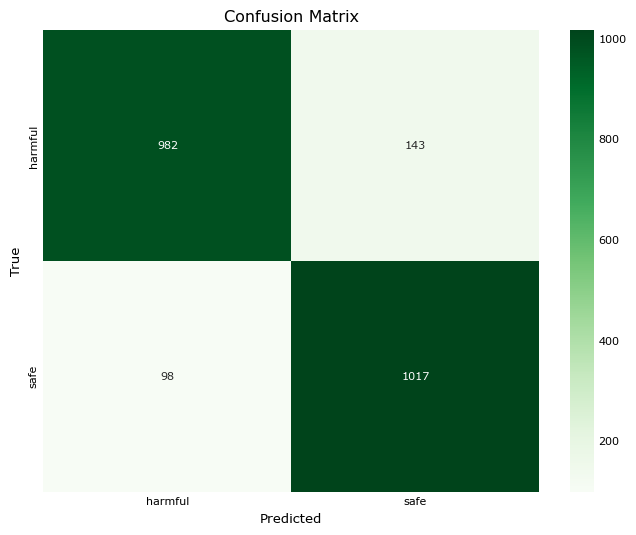

In [8]:

model.fit(X_train_transformed, y_train)
predictions = cross_val_predict(model, X_train_transformed, y_train, cv=5)

conf_matrix = confusion_matrix(y_train, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:

model.fit(X_train_transformed, y_train)
predictions = cross_val_predict(model, X_train_transformed, y_train, cv=5)

conf_matrix = confusion_matrix(y_train, predictions)
print(conf_matrix)

[[ 982  143]
 [  98 1017]]


In [10]:
# Classification Report
class_report = classification_report(y_train, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1125
           1       0.88      0.91      0.89      1115

    accuracy                           0.89      2240
   macro avg       0.89      0.89      0.89      2240
weighted avg       0.89      0.89      0.89      2240



In [11]:
# Predict on training and test data
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

# Print training accuracy
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train, y_train_pred):.4f}")

# Print test accuracy
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(y_test, y_test_pred):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 0.9107


In [12]:
url = "https://eezxodullgeunn.webflow.io"  # Example phishing URL

url_transformed = vectorizer.transform([url])

# Predict using the trained model
decision_prediction = model.predict(url_transformed)

# Inverse transform the prediction if necessary (e.g., for label encoding)
decision_predicted_class = label_encoder.inverse_transform(decision_prediction)

# Output the prediction (safe or phishing)
print(f"Random Forest prediction for: '{url}' -> {decision_predicted_class[0]}")

Random Forest prediction for: 'https://eezxodullgeunn.webflow.io' -> harmful


In [13]:
text = "u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020"

text_transformed = vectorizer.transform([text]) 

# Predict using the trained RandomForest model
decision_prediction = model.predict(text_transformed)

decision_predicted_class = label_encoder.inverse_transform(decision_prediction)

print(f"Random Forest prediction for: '{text}' -> {decision_predicted_class[0]}")

Random Forest prediction for: 'u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020' -> harmful


In [14]:
# df2 = df.groupby("Type").sample(n=700)
# print(df["Type"].value_counts()) 

print(df.groupby("Type").size())

Type
harmful    1400
safe       1400
dtype: int64


In [15]:
# -------------------------------- CODE BELOW IS TO EVALUATE MODEL PERFORMANCE & TESTING PURPOSES ------------------------------------

In [16]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # Define the different test ratios
# ratios = [0.5, 0.4, 0.3, 0.2, 0.1]

# # Create an empty list to store the classification report for each ratio
# classification_reports = []

# # Loop over each ratio and split the data
# for ratio in ratios:
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(
#         df.drop(columns=["Type"]),  # Features (excluding the target column)
#         df["Type"],  # Target column
#         test_size=ratio,  # Ratio of test data
#         random_state=42,  # For reproducibility
#         stratify=df["Type"]  # To maintain the class distribution
#     )

#     # Encode labels
#     label_encoder = LabelEncoder()
#     y_train = label_encoder.fit_transform(y_train)
#     y_test = label_encoder.transform(y_test)

#     # Initialize and fit TF-IDF vectorizer on training data
#     vectorizer = TfidfVectorizer()
#     X_train_transformed = vectorizer.fit_transform(X_train['Content'])
#     X_test_transformed = vectorizer.transform(X_test['Content'])

#     # Initialize and train the model
#     model = DecisionTreeClassifier(random_state=42)
#     model.fit(X_train_transformed, y_train)

#     # Make predictions on the test set
#     predictions = model.predict(X_test_transformed)

#     # Generate classification report
#     report = classification_report(y_test, predictions, output_dict=True)
#     classification_reports.append((ratio, report))

#     # Print the classification report for each ratio
#     print(f"\nClassification Report for Train/Test split: {100 - (ratio * 100)}% / {ratio * 100}%")
#     print("----------------------------------------------------------")
#     print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
#     print(classification_report(y_test, predictions))

In [17]:
# import pandas as pd

# # Assuming df is your dataframe containing the 'Type' column with 'safe' and 'harmful' labels.

# # Split the dataset by class
# safe_urls = df[df["Type"] == "safe"]
# harmful_urls = df[df["Type"] == "harmful"]

# # Define class distributions
# distributions = [
#     (0.5,0.5),
#     (0.6, 0.4),  # 60% safe, 40% harmful
#     (0.7, 0.3),  # 70% safe, 30% harmful
#     (0.8, 0.2),  # 80% safe, 20% harmful
#     (0.9, 0.1),   # 90% safe, 10% harmful
#     (0.4, 0.6),
#     (0.3,0.7),
#     (0.2,0.8),
#     (0.1,0.9)
# ]

# # Loop through each distribution and create a new dataset
# for safe_ratio, harmful_ratio in distributions:
#     # Calculate the number of samples to take from each class
#     safe_sample_size = int(len(safe_urls) * safe_ratio)
#     harmful_sample_size = int(len(harmful_urls) * harmful_ratio)
    
#     # Take the samples from each class
#     safe_sample = safe_urls.sample(n=safe_sample_size, random_state=42)
#     harmful_sample = harmful_urls.sample(n=harmful_sample_size, random_state=42)
    
#     # Combine the two samples to create the new dataset
#     new_dataset = pd.concat([safe_sample, harmful_sample], ignore_index=True)
    
#     # Shuffle the dataset (optional, but helps prevent order bias)
#     new_dataset = new_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
    
#     # Save or print the new dataset (optional)
#     new_dataset.to_csv(f"new_dataset_{int(safe_ratio*100)}_{int(harmful_ratio*100)}.csv", index=False)
    
#     print(f"New dataset with {int(safe_ratio*100)}% safe and {int(harmful_ratio*100)}% harmful URLs:")
#     print(new_dataset["Type"].value_counts())
#     print(new_dataset.head())
#     print(f"Shape of new dataset: {new_dataset.shape}\n")


In [18]:
# # Read the dataset
# df = pd.read_csv("new_dataset_60_40.csv")

# # Encode labels
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(df['Type'])

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.2, random_state=42)

# # Initialize and fit TF-IDF vectorizer on training data
# vectorizer = TfidfVectorizer()
# X_train_transformed = vectorizer.fit_transform(X_train['Content'])
# X_test_transformed = vectorizer.transform(X_test['Content'])

# # Initialize and train the model
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train_transformed, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test_transformed)

# # Classification Report
# class_report = classification_report(y_test, predictions)
# print("Classification Report:\n", class_report)

In [19]:
# import glob
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report

# # Use glob to search for all CSV files that follow a naming convention.
# dataset_files = glob.glob("new_dataset_*.csv")  # adjust folder/path as needed

# # Loop through each dataset and perform training and evaluation
# for file_path in dataset_files:
#     print(f"Processing dataset: {file_path}")
    
#     # Read the dataset
#     df = pd.read_csv(file_path)
    
#     # Encode the labels
#     label_encoder = LabelEncoder()
#     y = label_encoder.fit_transform(df['Type'])
    
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.2, random_state=42)
    
#     # Initialize and fit TF-IDF vectorizer on training data
#     vectorizer = TfidfVectorizer()
#     X_train_transformed = vectorizer.fit_transform(X_train['Content'])
#     X_test_transformed = vectorizer.transform(X_test['Content'])
    
#     # Initialize and train the model
#     model = DecisionTreeClassifier(random_state=42)
#     model.fit(X_train_transformed, y_train)
    
#     # Make predictions on the test set
#     predictions = model.predict(X_test_transformed)
    
#     # Print the classification report for the current dataset
#     report = classification_report(y_test, predictions)
#     print("Classification Report:")
#     print(report)
#     print("-" * 40)
